<a href="https://colab.research.google.com/github/laragervasi-coder/DS-Proyecto_Final_GERVASI/blob/main/ProyectoDS_EntregaFinal_GERVASI_Lara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS DE HOTELES EN TRES ESTADOS DE MALASIA**

## **Abstract**

El presente proyecto se utilizó un dataset proveniente de Kagle, y tiene como finalidad analizar de manera integral el desempeño y comportamiento de tres hoteles destacados de Malasia: Lexis Suites en Penang, Le Meridien en Sabah y The Hilton en Kuala Lumpur. La investigación se enfoca en aspectos clave de la operación hotelera, incluyendo los métodos de pago utilizados por los clientes, la cantidad de reservas por hotel y la distribución de reservas según la duración de la estadía en noches. Este análisis permitirá identificar patrones de consumo, preferencias de los huéspedes y diferencias operativas entre los hoteles, proporcionando información valiosa para la toma de decisiones estratégicas y la optimización de la gestión hotelera.

Asimismo, se analizará la evolución temporal de las reservas por hotel, con el objetivo de detectar tendencias mensuales o estacionales que puedan influir en la planificación de recursos y la implementación de promociones. Se evaluará la relación entre precio, cantidad de noches y hotel, identificando cómo varía la demanda según la inversión del cliente y la duración de la estancia. Este enfoque permitirá identificar segmentos de mercado rentables y oportunidades para optimizar ingresos, así como comprender mejor la relación entre tarifas y comportamiento del cliente en distintos contextos geográficos dentro de Malasia.

Finalmente, el proyecto incluirá un estudio sobre la satisfacción promedio por hotel y tipo de membresía, con el fin de evaluar la experiencia del huésped y la fidelización de los clientes. La combinación de análisis cuantitativos y comparativos entre los tres hoteles permitirá extraer conclusiones que contribuyan a mejorar el servicio, implementar estrategias de marketing y fidelización más efectivas y tomar decisiones basadas en datos. En conjunto, este proyecto proporcionará una visión integral del desempeño operativo y económico de los hoteles seleccionados, promoviendo la excelencia en la gestión hotelera y la satisfacción del cliente.

*Objetivo*

Analizar de manera integral el desempeño y comportamiento de los hoteles Lexis Suites, Le Meridien y The Hilton, evaluando métodos de pago, cantidad y duración de reservas, evolución temporal, relación entre precio, noches y hotel, así como la satisfacción promedio de los clientes y su membresía, con el fin de identificar patrones de consumo y oportunidades de mejora en la gestión hotelera.

*Preguntas/Hipótesis de Interes*

1. ¿Existe una diferencia entre las reservas anuales de los hoteles?
2. Los huespedes, ¿tienen un método de pago de preferencia?
3. ¿Cuántas noches se quedan en promedio los huespedes en los hoteles? ¿Existe diferencia entre los tres hoteles?
4. ¿En qué meses se presentan la mayor cantidad de reservas?
5. ¿Difiere en los hoteles el precio de la habitación por noche de estadía?
6. La membresía de los huespedes, ¿condiciona la satisfacción luego de la estadía?

# **Visualizaciones y análisis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import os

file_path = '/content/drive/MyDrive/Colab Notebooks/transactions.xlsx'
df = pd.read_excel(file_path)
display (df)

,hotel_name,reg,state,types,cus_name,phone_no,emel,customer_rating,membership,rep_guest,...,sales,dep,d_s,arrival_date,depature_date,ADR,Sales Person,pos,comm_pay,customer_review
0,"Lexis Suites, Penang",North,Penang,City Hotel,Ernest Barnes,669-792-1661,Ernest.Barnes31@outlook.com,5,Platinum,0,...,4280.0,300,Refunded,2024-04-02,2024-04-10,0.0,Leo,Sales Manager,15,Excellent
1,"Lexis Suites, Penang",North,Penang,City Hotel,Andrea Baker,858-637-6955,Andrea_Baker94@aol.com,4,Gold,0,...,3945.0,300,Refunded,2024-07-13,2024-07-19,0.0,Kelly,Sales Executive,20,Very Good
2,"Lexis Suites, Penang",North,Penang,City Hotel,Rebecca Parker,652-885-2745,Rebecca_Parker@comcast.net,5,Platinum,0,...,6695.0,300,Refunded,2024-08-22,2024-09-04,75.0,Bernice,Sales Executive,15,Excellent
3,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Laura Murray,364-656-8427,Laura_M@gmail.com,4,Platinum,0,...,10200.0,300,Refunded,2024-05-16,2024-05-22,75.0,Leo,Sales Manager,30,Very Good
4,"The Hilton, Kuala Lumpur",Central,Kuala Lumpur,City Hotel,Linda Hines,713-226-5883,LHines@verizon.com,5,Platinum,0,...,3325.0,300,Forfeited,2024-02-05,2024-02-10,98.0,Leo,Sales Manager,20,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,"Lexis Suites, Penang",North,Penang,City Hotel,Claudia Johnson,403-092-5582,Claudia.J@yahoo.com,4,Platinum,0,...,6180.0,300,Refunded,2024-01-10,2024-01-22,90.0,Derek,Sales Executive,15,Very Good
6046,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Wesley Aguilar,238-763-0612,WAguilar@xfinity.com,2,Gold,0,...,16275.0,300,Refunded,2024-07-03,2024-07-13,105.0,Leo,Sales Manager,25,Poor
6047,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Mary Morales,395-518-4100,Mary_Morales@hotmail.com,2,Gold,0,...,677.5,300,Refunded,2024-05-23,2024-05-24,80.0,Derek,Sales Executive,20,Poor
6048,"Lexis Suites, Penang",North,Penang,City Hotel,Caroline Conley MD,531-528-1017,MD_Caroline@comcast.net,4,Platinum,0,...,2060.0,300,Refunded,2024-03-15,2024-03-19,73.0,Leo,Sales Manager,15,Very Good


## **Limpieza de dataset**

Se realiza limpieza de dataset, observando que columnas contienen valores nulos. Asi mismo, hay columnas que no son relevantes para nuestro análisis, como el número telefónico y el correo electrónico del usuario. Dichas columnas se eliminarán.

In [4]:
df = df.drop(["phone_no", "emel"], axis=1)
df.to_excel("tu_archivo_sin_columnas.xlsx", index=False)
display (df)

,hotel_name,reg,state,types,cus_name,customer_rating,membership,rep_guest,prev_cancel,payment_method,...,sales,dep,d_s,arrival_date,depature_date,ADR,Sales Person,pos,comm_pay,customer_review
0,"Lexis Suites, Penang",North,Penang,City Hotel,Ernest Barnes,5,Platinum,0,0,Credit Card,...,4280.0,300,Refunded,2024-04-02,2024-04-10,0.0,Leo,Sales Manager,15,Excellent
1,"Lexis Suites, Penang",North,Penang,City Hotel,Andrea Baker,4,Gold,0,0,Credit Card,...,3945.0,300,Refunded,2024-07-13,2024-07-19,0.0,Kelly,Sales Executive,20,Very Good
2,"Lexis Suites, Penang",North,Penang,City Hotel,Rebecca Parker,5,Platinum,0,0,Online Transfer,...,6695.0,300,Refunded,2024-08-22,2024-09-04,75.0,Bernice,Sales Executive,15,Excellent
3,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Laura Murray,4,Platinum,0,0,Credit Card,...,10200.0,300,Refunded,2024-05-16,2024-05-22,75.0,Leo,Sales Manager,30,Very Good
4,"The Hilton, Kuala Lumpur",Central,Kuala Lumpur,City Hotel,Linda Hines,5,Platinum,0,0,Online Transfer,...,3325.0,300,Forfeited,2024-02-05,2024-02-10,98.0,Leo,Sales Manager,20,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,"Lexis Suites, Penang",North,Penang,City Hotel,Claudia Johnson,4,Platinum,0,0,Cash,...,6180.0,300,Refunded,2024-01-10,2024-01-22,90.0,Derek,Sales Executive,15,Very Good
6046,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Wesley Aguilar,2,Gold,0,0,Credit Card,...,16275.0,300,Refunded,2024-07-03,2024-07-13,105.0,Leo,Sales Manager,25,Poor
6047,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Mary Morales,2,Gold,0,0,Credit Card,...,677.5,300,Refunded,2024-05-23,2024-05-24,80.0,Derek,Sales Executive,20,Poor
6048,"Lexis Suites, Penang",North,Penang,City Hotel,Caroline Conley MD,4,Platinum,0,0,Cash,...,2060.0,300,Refunded,2024-03-15,2024-03-19,73.0,Leo,Sales Manager,15,Very Good


In [5]:
valores_nulos_por_columna = df.isnull().sum()
print(valores_nulos_por_columna)

hotel_name          0
reg                 0
state               0
types               0
cus_name            0
customer_rating     0
membership         83
rep_guest           0
prev_cancel         0
payment_method      0
card_no             0
resv_status         0
meal                0
assgn_room          0
cus_seg             0
room-type           0
adult               0
(child)             0
dis_channel         0
price               0
nights              0
package_            0
gross               0
disc                0
disc_amt            0
sales               0
dep                 0
d_s                 0
arrival_date        0
depature_date       0
ADR                 0
Sales Person        0
pos                 0
comm_pay            0
customer_review     0
dtype: int64


Se observa que la única columna que contiene valores nulos es la columna "Membership".

In [6]:
df["membership"].unique()


array(['Platinum', 'Gold', nan], dtype=object)

In [7]:
filas_nulas = df[df['membership'].isnull()]
print (filas_nulas.head(10))

                  hotel_name      reg         state          types  \
14      Lexis Suites, Penang    North       Penang     City Hotel    
26      Lexis Suites, Penang    North       Penang     City Hotel    
29      Lexis Suites, Penang    North       Penang     City Hotel    
30        Le Méridien, Sabah     East         Sabah  Resort Hotel    
43  The Hilton, Kuala Lumpur  Central  Kuala Lumpur    City Hotel    
50  The Hilton, Kuala Lumpur  Central  Kuala Lumpur    City Hotel    
57        Le Méridien, Sabah     East         Sabah  Resort Hotel    
58      Lexis Suites, Penang    North       Penang     City Hotel    
61      Lexis Suites, Penang    North       Penang     City Hotel    
64      Lexis Suites, Penang    North       Penang     City Hotel    

            cus_name  customer_rating membership  rep_guest  prev_cancel  \
14     Edward Torres                5        NaN          0            0   
26  Michael Davidson                5        NaN          0            0   
2

Luego de obtener que las categorías de "Membership" son tres, se resuelve que los valores NAN serán reemplazados por "NO", ya que vamos a considerar que esos valores nulos son usuarios que no tienen membresía.

In [8]:
df["membership"] = df["membership"].fillna("no")
df.to_excel("tu_archivo_limpio.xlsx", index=False)
display(df)

,hotel_name,reg,state,types,cus_name,customer_rating,membership,rep_guest,prev_cancel,payment_method,...,sales,dep,d_s,arrival_date,depature_date,ADR,Sales Person,pos,comm_pay,customer_review
0,"Lexis Suites, Penang",North,Penang,City Hotel,Ernest Barnes,5,Platinum,0,0,Credit Card,...,4280.0,300,Refunded,2024-04-02,2024-04-10,0.0,Leo,Sales Manager,15,Excellent
1,"Lexis Suites, Penang",North,Penang,City Hotel,Andrea Baker,4,Gold,0,0,Credit Card,...,3945.0,300,Refunded,2024-07-13,2024-07-19,0.0,Kelly,Sales Executive,20,Very Good
2,"Lexis Suites, Penang",North,Penang,City Hotel,Rebecca Parker,5,Platinum,0,0,Online Transfer,...,6695.0,300,Refunded,2024-08-22,2024-09-04,75.0,Bernice,Sales Executive,15,Excellent
3,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Laura Murray,4,Platinum,0,0,Credit Card,...,10200.0,300,Refunded,2024-05-16,2024-05-22,75.0,Leo,Sales Manager,30,Very Good
4,"The Hilton, Kuala Lumpur",Central,Kuala Lumpur,City Hotel,Linda Hines,5,Platinum,0,0,Online Transfer,...,3325.0,300,Forfeited,2024-02-05,2024-02-10,98.0,Leo,Sales Manager,20,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,"Lexis Suites, Penang",North,Penang,City Hotel,Claudia Johnson,4,Platinum,0,0,Cash,...,6180.0,300,Refunded,2024-01-10,2024-01-22,90.0,Derek,Sales Executive,15,Very Good
6046,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Wesley Aguilar,2,Gold,0,0,Credit Card,...,16275.0,300,Refunded,2024-07-03,2024-07-13,105.0,Leo,Sales Manager,25,Poor
6047,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Mary Morales,2,Gold,0,0,Credit Card,...,677.5,300,Refunded,2024-05-23,2024-05-24,80.0,Derek,Sales Executive,20,Poor
6048,"Lexis Suites, Penang",North,Penang,City Hotel,Caroline Conley MD,4,Platinum,0,0,Cash,...,2060.0,300,Refunded,2024-03-15,2024-03-19,73.0,Leo,Sales Manager,15,Very Good


# **Analisis Univariado**
## Cantidad de Reservas por Hotel

hotel_name
Lexis Suites, Penang        2036
Le Méridien, Sabah          2011
The Hilton, Kuala Lumpur    2003
Name: count, dtype: int64


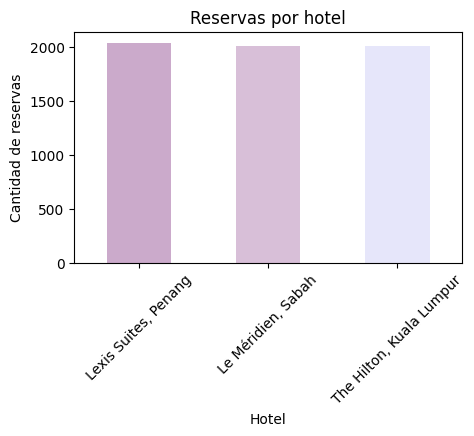

In [9]:
reservas_por_hotel = df['hotel_name'].value_counts()
print(reservas_por_hotel)
colores_pastel = ['#CBAACB', '#D8BFD8', '#E6E6FA']
reservas_por_hotel.plot(kind='bar', figsize=(5,3), color=colores_pastel[:len(reservas_por_hotel)])
plt.xlabel("Hotel")
plt.ylabel("Cantidad de reservas")
plt.title("Reservas por hotel")
plt.xticks(rotation=45)
plt.show()

## Métodos de Pago Utilizados

Cantidad de reservas por método de pago:
 payment_method
Credit Card        2200
Cash               1933
Online Transfer    1917
Name: count, dtype: int64

Porcentaje de reservas por método de pago:
 payment_method
Credit Card        36.36
Cash               31.95
Online Transfer    31.69
Name: proportion, dtype: float64


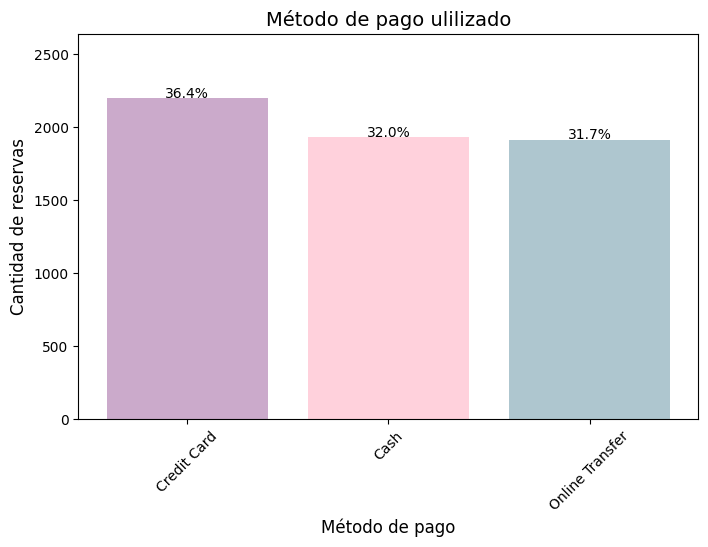

In [10]:
metodos_pago = df['payment_method'].value_counts()
porcentaje_pago = df['payment_method'].value_counts(normalize=True) * 100
print("Cantidad de reservas por método de pago:\n", metodos_pago)
print("\nPorcentaje de reservas por método de pago:\n", porcentaje_pago.round(2))

colores_pastel = ['#CBAACB', '#FFD1DC', '#AEC6CF', '#77DD77', '#FDFD96']

plt.figure(figsize=(8,5))
bars = plt.bar(metodos_pago.index, metodos_pago.values, color=colores_pastel[:len(metodos_pago)])

for bar, porcentaje in zip(bars, porcentaje_pago):
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 2, f'{porcentaje:.1f}%',
             ha='center', fontsize=10,)

plt.title("Método de pago ulilizado", fontsize=14)
plt.xlabel("Método de pago", fontsize=12)
plt.ylabel("Cantidad de reservas", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(metodos_pago.values)*1.2)

plt.show()

## Métodos de Pago Utilizados por hotel

payment_method            Cash  Credit Card  Online Transfer
hotel_name                                                  
Le Méridien, Sabah         652          699              660
Lexis Suites, Penang       640          763              633
The Hilton, Kuala Lumpur   641          738              624


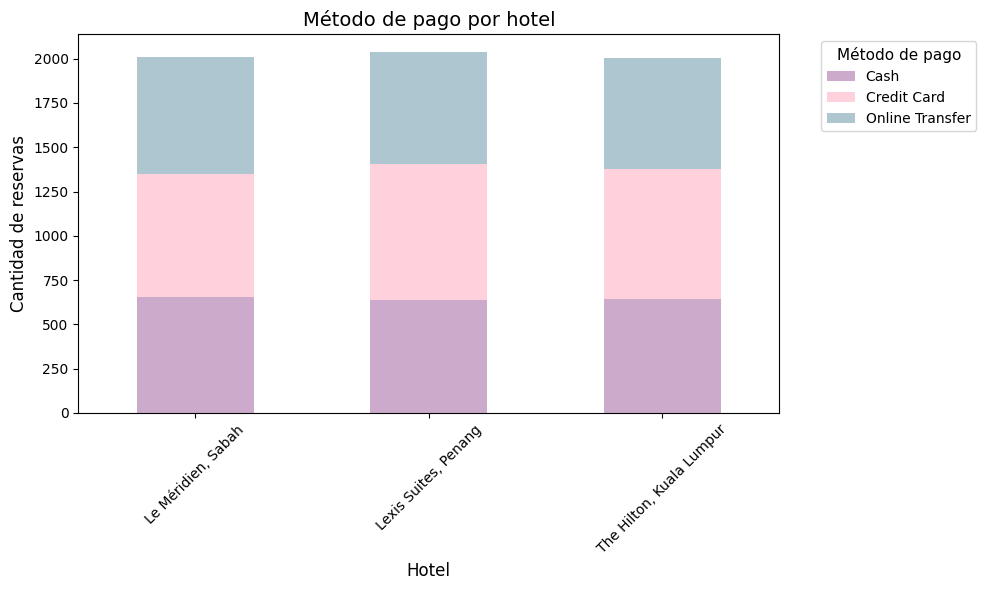

In [11]:
pagos_por_hotel = pd.crosstab(df['hotel_name'], df['payment_method'])
print(pagos_por_hotel)

colores_pastel = ['#CBAACB', '#FFD1DC', '#AEC6CF', '#77DD77', '#FDFD96']  # colores pasteles

pagos_por_hotel.plot(kind='bar', stacked=True, color=colores_pastel[:pagos_por_hotel.shape[1]], figsize=(10,6))

plt.title("Método de pago por hotel", fontsize=14)
plt.xlabel("Hotel", fontsize=12)
plt.ylabel("Cantidad de reservas", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Método de pago", fontsize=10, title_fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Análisis Bivariado**

### Cantidad de reservas según noches de estadía

/tmp/ipython-input-3575718548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


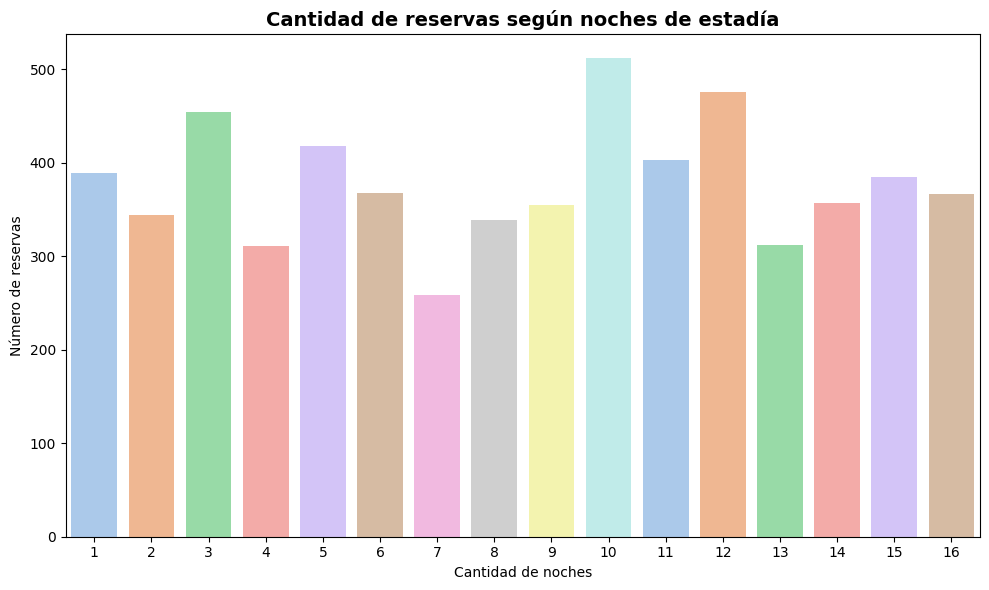

In [12]:
reservas_por_noche = df["nights"].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(
    x=reservas_por_noche.index,
    y=reservas_por_noche.values,
    palette="pastel")
plt.title("Cantidad de reservas según noches de estadía", fontsize=14, fontweight="bold")
plt.xlabel("Cantidad de noches")
plt.ylabel("Número de reservas")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## **Análisis Bivariado**

Distribución de reservas según noches, diferenciados por hotel

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


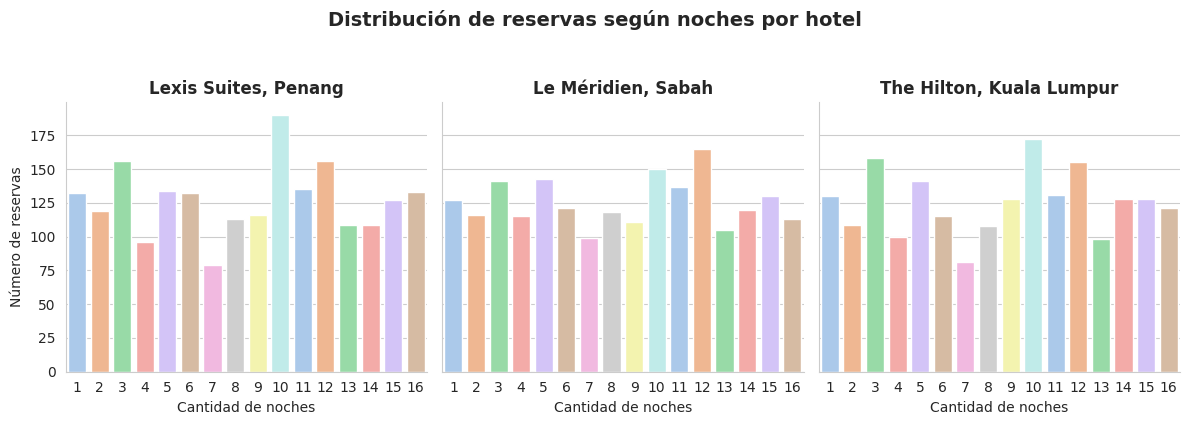

In [13]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
g = sns.FacetGrid(df, col="hotel_name", col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.countplot, x="nights", palette="pastel")
g.set_titles(col_template="{col_name}", size=12, weight="bold")
g.set_axis_labels("Cantidad de noches", "Número de reservas")
g.fig.suptitle("Distribución de reservas según noches por hotel", fontsize=14, weight="bold", y=1.05)
plt.tight_layout()
plt.show()

## **Análisis Bivariado con componente temporal**

### Evolución mensual de las reservas por hotel

  arrival_date       Mes
0   2024-04-02     April
1   2024-07-13      July
2   2024-08-22    August
3   2024-05-16       May
4   2024-02-05  February


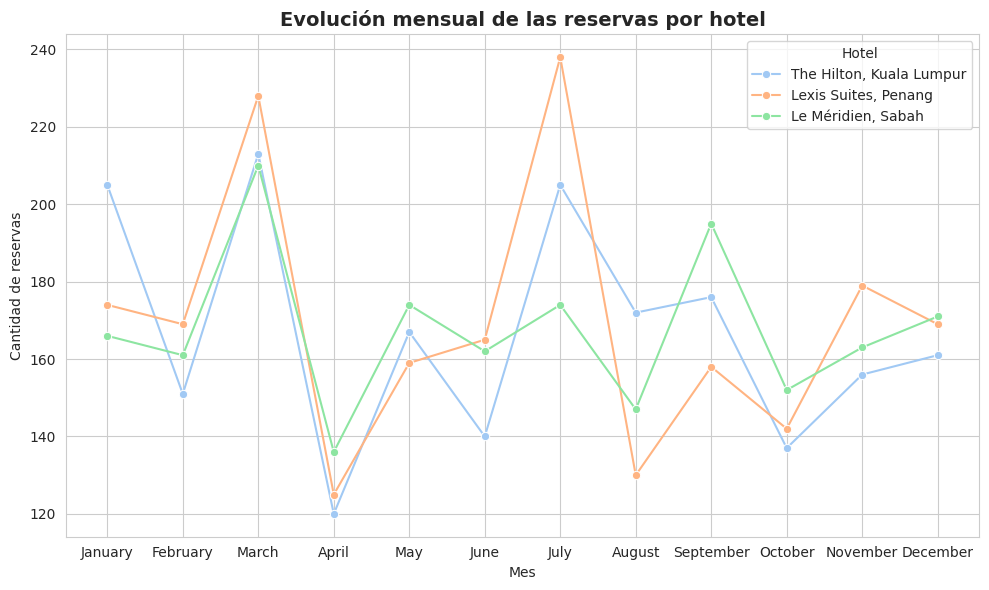

In [14]:
df["arrival_date"] = pd.to_datetime(df["arrival_date"], errors="coerce")
df["Mes"] = df["arrival_date"].dt.month_name()
print(df[["arrival_date", "Mes"]].head())

reservas_mes = df.groupby(["Mes", "hotel_name"]).size().reset_index(name="cantidad_reservas")


meses_orden = ["January","February","March","April","May","June","July","August","September","October","November","December"]
reservas_mes["Mes"] = pd.Categorical(reservas_mes["Mes"], categories=meses_orden, ordered=True)
reservas_mes = reservas_mes.sort_values("Mes")


plt.figure(figsize=(10,6))
sns.lineplot(
    data=reservas_mes,
    x="Mes",
    y="cantidad_reservas",
    hue="hotel_name",
    marker="o",
    palette="pastel")

plt.title("Evolución mensual de las reservas por hotel", fontsize=14, fontweight="bold")
plt.xlabel("Mes")
plt.ylabel("Cantidad de reservas")
plt.legend(title="Hotel", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

## **Análisis Multivariado**

### Relación entre precios, cantidad de noches y hoteles

<Figure size 1000x600 with 0 Axes>

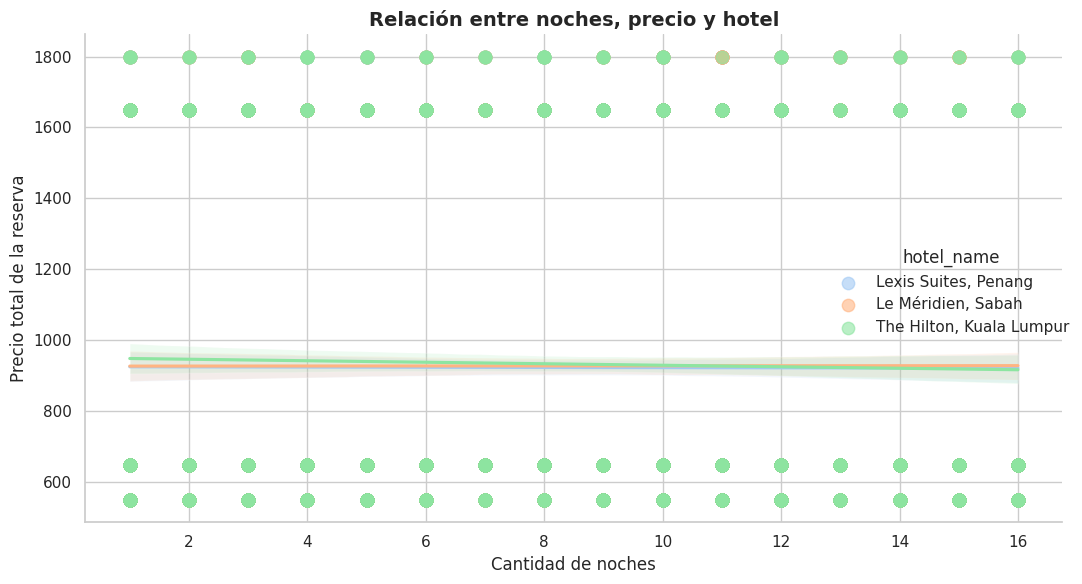

In [15]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10,6))
sns.lmplot(
    data=df,
    x="nights",
    y="price",
    hue="hotel_name",
    aspect=1.4,
    height=6,
    scatter_kws={"alpha":0.6, "s":80},
    palette="pastel")

plt.title("Relación entre noches, precio y hotel", fontsize=14, fontweight="bold")
plt.xlabel("Cantidad de noches")
plt.ylabel("Precio total de la reserva")
plt.tight_layout()
plt.show()

### Satisfacción promedio por hotel y membresía

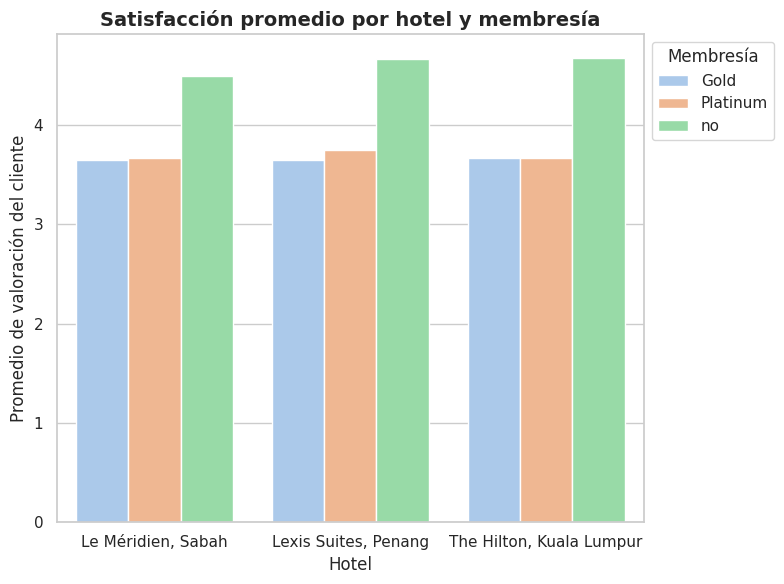

In [16]:
df_grouped = df.groupby(["hotel_name", "membership"])["customer_rating"].mean().reset_index()

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_grouped,
    x="hotel_name",
    y="customer_rating",
    hue="membership",
    palette="pastel")

plt.title("Satisfacción promedio por hotel y membresía", fontsize=14, fontweight="bold")
plt.xlabel("Hotel")
plt.ylabel("Promedio de valoración del cliente")
plt.legend(title="Membresía", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()




## **Conclusiones Preliminares**

* La cantidad de reservas anuales es similar en los tres hoteles.
* No se observa diferencia entre los métodos de pago utilizados.
* Los huespedes reservan con mayor frecuencia 10 noches.
* Se observa un aumento de reservas en los meses de Febrero-Marzo y Junio-Julio, lo cual estaría relacionado con las temporadas altas de turismo.
* La relación entre noches y precios es similar en los tres hoteles analizados.
*   Los huespedes sin membresía refieren mayor satisfacción que los huespedes con membresía, ya sea Gold o Platinum.




**Detección de outliers usando IQR**

In [17]:
df = pd.read_excel("tu_archivo_limpio.xlsx")

def quitar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]
    return df_filtrado


df_sin_outliers_price = quitar_outliers(df, 'price')
df_sin_outliers_nights = quitar_outliers(df_sin_outliers_price, 'nights')
df_sin_outliers_ADR = quitar_outliers(df_sin_outliers_nights, 'ADR')

print("Filas originales:", len(df))
print("Filas sin outliers:", len(df_sin_outliers_ADR))

Filas originales: 6050
Filas sin outliers: 5819


/tmp/ipython-input-203589388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_sin_outliers_ADR['price'], palette='Pastel1')
/tmp/ipython-input-203589388.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_sin_outliers_ADR['nights'], palette='Pastel1')
/tmp/ipython-input-203589388.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_sin_outliers_ADR['ADR'], palette='Pastel1')


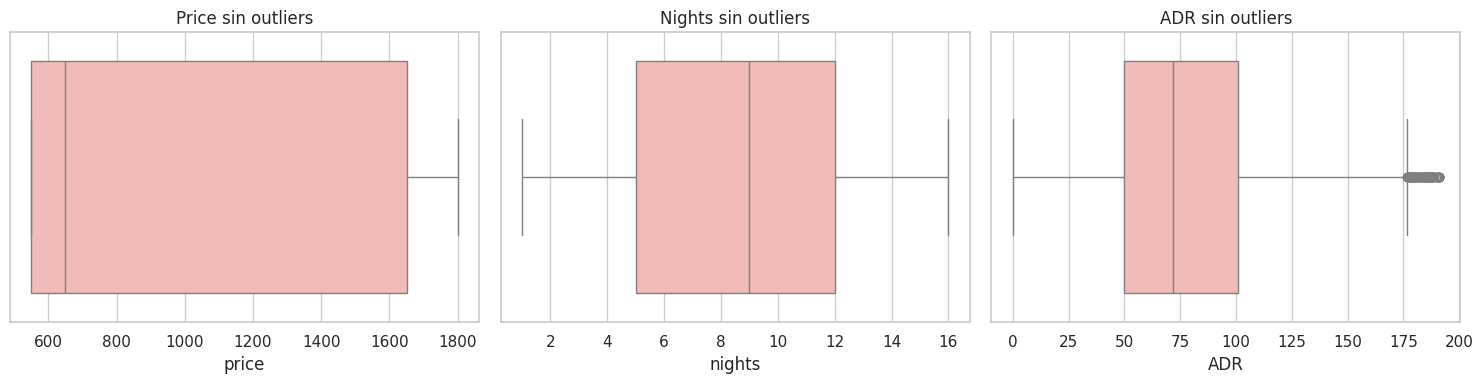

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(x=df_sin_outliers_ADR['price'], palette='Pastel1')
plt.title("Price sin outliers")

plt.subplot(1,3,2)
sns.boxplot(x=df_sin_outliers_ADR['nights'], palette='Pastel1')
plt.title("Nights sin outliers")

plt.subplot(1,3,3)
sns.boxplot(x=df_sin_outliers_ADR['ADR'], palette='Pastel1')
plt.title("ADR sin outliers")

plt.tight_layout()
plt.show()